In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Load tax data as CSV

In [13]:
df = pd.read_csv("../data/tax-data-2023.5.csv")
df.head()

,monthly gross income,net income,social security payments,income tax
0,0.0,0.0,0.0,0.0
1,100.0,79.0,21.0,0.0
2,200.0,158.0,42.0,0.0
3,300.0,237.0,63.0,0.0
4,400.0,316.0,84.0,0.0


## Fit polynomes to different netto ranges

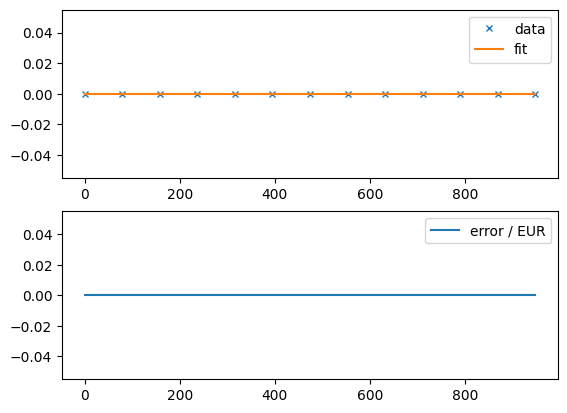

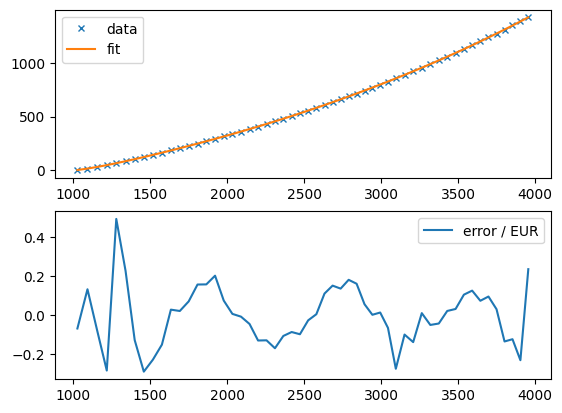

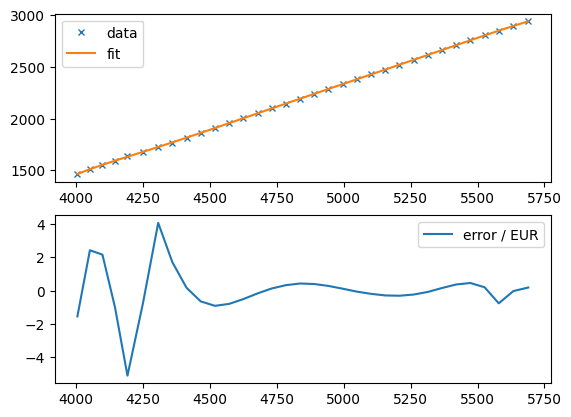

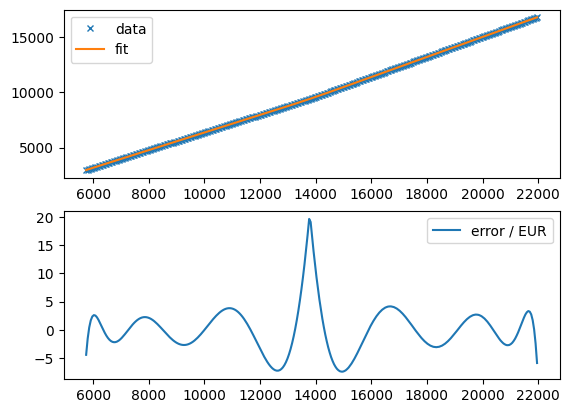

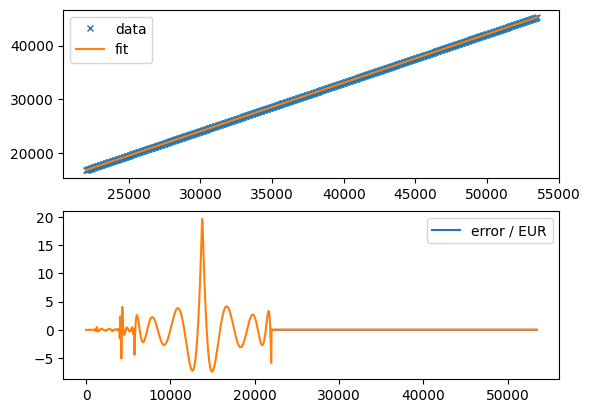

In [29]:
netIncomeRanges = [
    {
        "from": 0,
        "to": 1021,
        "degree": 0,
    },
    {
        "from": 1021,
        "to": 4000,
        "degree": 8,
    },
    {
        "from": 4000,
        "to": 5700,
        "degree": 8,
    },
    {
        "from": 5700,
        "to": 22000,
        "degree": 12,
    },
    {
        "from": 22000,
        "to": 100000,
        "degree": 1,
    }
]

resultingPolynomes = []
netIncomeSamples = []
taxSamples = []
estimationSamples = []
estimationErrors = []

for r in netIncomeRanges:
    selector = df['net income'].between(r['from'], r['to'], inclusive='left') 
    netIncomes = df[selector]['net income'].to_numpy()
    taxes = df[selector]['income tax'].to_numpy()
    netIncomeSamples = np.append(netIncomeSamples, netIncomes)
    taxSamples = np.append(taxSamples, taxes)

    poly,residuals,_,_,_ = np.polyfit(netIncomes, taxes, deg=r['degree'], full = True)

    estimations = np.polyval(poly, netIncomes)
    estimationSamples = np.append(estimationSamples, estimations)
    
    fig, axs = plt.subplots(2)
    axs[0].plot(netIncomes, taxes, 'x', markersize=5, label='data')
    axs[0].plot(netIncomes, estimations, label='fit')
    axs[0].legend()

    errors = np.subtract(estimations, taxes)
    estimationErrors = np.append(estimationErrors, errors)
    axs[1].plot(netIncomes, errors, label='error / EUR')
    axs[1].legend()
    
    poly = poly.tolist()
    poly.reverse()
    resultingPolynomes.append({
        'from': r['from'],
        'to': r['to'],
        'polynome': poly,
    })
plt.plot(netIncomeSamples, estimationErrors)

## Export polynomes to be used in JS Library

In [32]:
polynomesJSON = json.dumps({"netToTax": resultingPolynomes})
# print(polynomesJSON)

with open("../src/polynomes.json", "w") as outfile:
    outfile.write(polynomesJSON)